In [113]:
import BRISTOR

from prophet import Prophet
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
### Loading 
bristor_df = BRISTOR.load_bristor_into_df("/home/stefan/Downloads/files/BRISTOR_Zegoland.xlsx")


/home/stefan/PycharmProjects/LauzHack2024/BRISTOR.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  result = pd.to_datetime(series, errors='raise')
/home/stefan/PycharmProjects/LauzHack2024/BRISTOR.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  result = pd.to_datetime(series, errors='raise')
/home/stefan/PycharmProjects/LauzHack2024/BRISTOR.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  result = pd.to_datetime(series, errors='raise')
/home/stefan/PycharmProjects/LauzHack2024/BRISTOR.py:24: UserWarning: Could not infer format, so each element will be parsed in

In [115]:
# data_dict = {
#     'ds': pd.date_range(start="2020-08-01", end="2024-10-01", freq="M"),
#     'bristor_new_patients': bristor_df[3][:44]['Value'],
#     'competitors_new_patients': bristor_df[3][44:87]['Value'],
#     'bristor_emails': bristor_df[4][:51]['Value'],
#     'bristor_call': bristor_df[4][51:]['Value'],
#     'bristor_share_of_voice': bristor_df[5][:40]['Value'],
#     'competitors_share_of_voice': bristor_df[5][40:80]['Value'],
#     'bristor_factory_volumes': bristor_df[0]['Value'],
#     'bristor_demand_volumes': bristor_df[2][:46]['Value'],
#     'competitors_demand_volumes': bristor_df[2][46:92]['Value']
# }


In [117]:
### hardcoding signals
ds = pd.date_range(start="2020-08-01", end="2024-10-01", freq="M"),


bristor_new_patients = bristor_df[3][:44].set_index('Date')['Value'].rename('bristor_new_patients')
competitors_new_patients = bristor_df[3][44:87].set_index('Date')['Value'].rename('competitors_new_patients')
bristor_emails = bristor_df[4][:51].set_index('Date')['Value'].rename('bristor_emails')
bristor_call = bristor_df[4][51:].set_index('Date')['Value'].rename('bristor_call')
bristor_share_of_voice = bristor_df[5][:40].set_index('Date')['Value'].rename('bristor_share_of_voice')
competitors_share_of_voice = bristor_df[5][40:80].set_index('Date')['Value'].rename('competitors_share_of_voice')
bristor_factory_volumes = bristor_df[0].set_index('Date')['Value'].rename('bristor_factory_volumes')
bristor_demand_volumes = bristor_df[2][:46].set_index('Date')['Value'].rename('y') # bristor_demand_volumes
competitors_demand_volumes = bristor_df[2][46:92].set_index('Date')['Value'].rename('competitors_demand_volumes')


df = bristor_demand_volumes.to_frame().join(competitors_new_patients, how='outer').join(bristor_emails, how='outer').join(bristor_call, how='outer').join(bristor_share_of_voice, how='outer').join(competitors_share_of_voice, how='outer').join(bristor_factory_volumes, how='outer').join(bristor_new_patients, how='outer').join(competitors_demand_volumes, how='outer').reset_index().rename(columns={'Date': 'ds'})



### TODO check if this makes sense
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')


#df = df.fillna(0)

/tmp/ipykernel_255835/2078109879.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ds = pd.date_range(start="2020-08-01", end="2024-10-01", freq="M"),
/tmp/ipykernel_255835/2078109879.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')
/tmp/ipykernel_255835/2078109879.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [118]:
df

,ds,y,competitors_new_patients,bristor_emails,bristor_call,bristor_share_of_voice,competitors_share_of_voice,bristor_factory_volumes,bristor_new_patients,competitors_demand_volumes
0,2020-07-01,3087.000000,2596.0,29.0,483,0.104353,0.895647,450.80,107.0,3.361578e+06
1,2020-07-01,3087.000000,2596.0,29.0,1,0.104353,0.895647,450.80,107.0,3.361578e+06
2,2020-07-01,3087.000000,2596.0,29.0,21,0.104353,0.895647,450.80,107.0,3.361578e+06
3,2020-08-01,3087.000000,2596.0,146.0,826,0.104353,0.895647,450.80,107.0,3.361578e+06
4,2020-08-01,3087.000000,2596.0,146.0,6,0.104353,0.895647,450.80,107.0,3.361578e+06
...,...,...,...,...,...,...,...,...,...,...
200,2024-10-01,103557.216597,2781.0,129.0,125,0.048278,0.951722,115088.32,79.0,3.580812e+06
201,2024-10-01,103557.216597,2781.0,129.0,1028,0.048278,0.951722,115088.32,79.0,3.580812e+06
202,2024-10-01,103557.216597,2781.0,129.0,77,0.048278,0.951722,115088.32,79.0,3.580812e+06
203,2024-10-01,103557.216597,2781.0,129.0,2,0.048278,0.951722,115088.32,79.0,3.580812e+06


In [119]:
model = Prophet() # TODO tweak parameters
model.add_regressor('competitors_new_patients')
model.add_regressor('bristor_emails')
model.add_regressor('bristor_call')
model.add_regressor('competitors_share_of_voice')
model.add_regressor('bristor_share_of_voice')
model.add_regressor('bristor_factory_volumes')
model.add_regressor('bristor_new_patients')
#model.add_regressor('competitor_demand_volumes')
model.add_regressor('competitors_demand_volumes')
#model.add_regressor('bristor_demand_volumes')



# Fit the model
model.fit(df)
# If a competitor releases a

21:39:00 - cmdstanpy - INFO - Chain [1] start processing
21:39:00 - cmdstanpy - INFO - Chain [1] done processing


In [127]:
# Create future DataFrame
future = model.make_future_dataframe(periods=12, freq="M")  # Forecast for next 12 months
future['competitors_new_patients'] = df['competitors_new_patients']
future['bristor_emails'] = df['bristor_emails']
future['bristor_call'] = df['bristor_call']
future['competitors_share_of_voice'] = df['competitors_share_of_voice']
future['bristor_share_of_voice'] = df['bristor_share_of_voice']
future['bristor_factory_volumes'] = df['bristor_factory_volumes']
future['bristor_new_patients'] = df['bristor_new_patients']
future['competitors_demand_volumes'] = df['competitors_demand_volumes']

event_start = pd.to_datetime("2025-04-01")
impact = 0.9 # 10% reduction in demand
# Adjust SoV for competitor impact
for i, date in enumerate(future['ds']): # TODO fix the share of voice
    if date >= event_start:
        future.loc[i, 'bristor_share_of_voice'] *= impact  # Reduce SoV by 10%


/home/stefan/miniconda3/envs/LauzHack2024/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [122]:
# Make predictions
forecast = model.predict(future)


In [124]:
future

,ds,competitors_new_patients,bristor_emails,bristor_call,competitors_share_of_voice,bristor_share_of_voice,bristor_factory_volumes,bristor_new_patients,competitors_demand_volumes
0,2020-07-01,2596.0,29.0,483,0.895647,0.104353,450.80,107.0,3.361578e+06
1,2020-08-01,2596.0,29.0,1,0.895647,0.104353,450.80,107.0,3.361578e+06
2,2020-09-01,2596.0,29.0,21,0.895647,0.104353,450.80,107.0,3.361578e+06
3,2020-10-01,2596.0,146.0,826,0.895647,0.104353,450.80,107.0,3.361578e+06
4,2020-11-01,2596.0,146.0,6,0.895647,0.104353,450.80,107.0,3.361578e+06
...,...,...,...,...,...,...,...,...,...
59,2025-05-31,2676.0,490.0,183,0.936913,0.063087,39583.46,146.0,3.687867e+06
60,2025-06-30,2862.0,778.0,993,0.935258,0.064742,56305.84,147.0,3.614874e+06
61,2025-07-31,2862.0,778.0,960,0.935258,0.064742,56305.84,147.0,3.614874e+06
62,2025-08-31,2862.0,778.0,21,0.935258,0.064742,56305.84,147.0,3.614874e+06


In [123]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
52,2024-10-31,97712.472732,95730.946959,99719.341639
53,2024-11-30,96056.058535,93944.881267,98010.283721
54,2024-12-31,108412.313767,106219.152722,110537.821628
55,2025-01-31,98436.256480,96275.212905,100448.294631
56,2025-02-28,107042.091846,104701.138478,109281.727241
57,2025-03-31,93247.037843,90875.984474,95608.128040
58,2025-04-30,107059.228359,104268.788832,109514.181286
59,2025-05-31,109672.237646,106489.669263,112453.724487
60,2025-06-30,105857.068256,102561.679864,109001.649664
61,2025-07-31,109681.966353,106201.746663,113138.226610


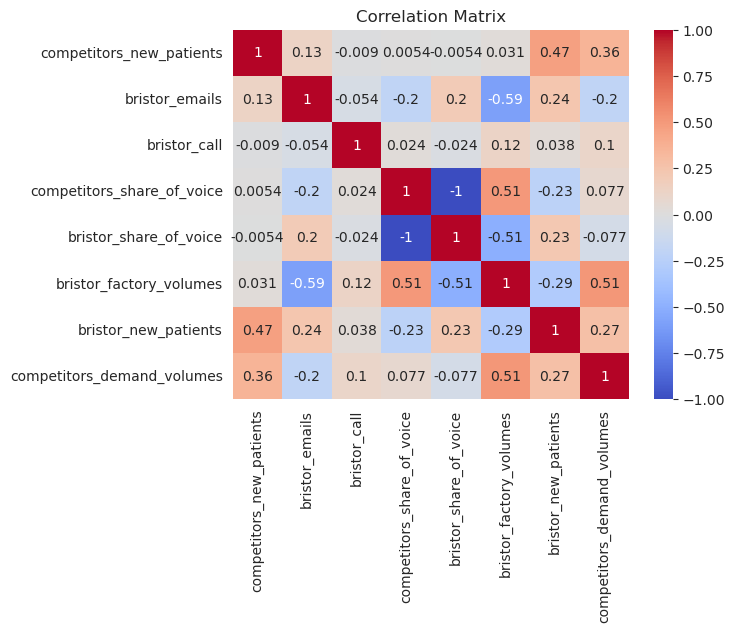

In [125]:
### CORRELATION MATRIX


regressor_names_historic_data = ['competitors_new_patients', 'bristor_emails', 'bristor_call', 'competitors_share_of_voice', 'bristor_share_of_voice', 'bristor_factory_volumes', 'bristor_new_patients', 'competitors_demand_volumes']
# Correlation heatmap
correlation_matrix = df[regressor_names_historic_data].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()